## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.06964498],
       [0.3029573 ],
       [0.72852555],
       [0.74760031],
       [0.82579325]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.06958869,  0.29834413,  0.66577019,  0.67988097,  0.73508582,
        0.86861929,  0.931509  ,  0.96269291,  0.97036882,  0.97734361,
        0.99520582,  0.99610441,  0.99930243,  0.99345437,  0.98317492,
        0.92309013,  0.91569419,  0.88855167,  0.87479967,  0.79796092,
        0.78400704,  0.69005297,  0.60968203,  0.50027046,  0.48618329,
        0.43370662,  0.26991971,  0.23111032, -0.02316899, -0.03687098,
       -0.20085359, -0.20751028, -0.29947999, -0.37627487, -0.60886316,
       -0.92982611, -0.98474742, -0.99193216, -0.99769844, -0.98063511])

In [5]:
np.sin( X )[:5]

array([[0.06958869],
       [0.29834413],
       [0.66577019],
       [0.67988097],
       [0.73508582]])

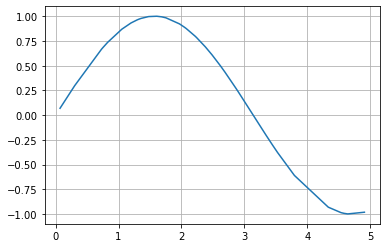

In [6]:
plt.plot( X, y )
plt.grid()
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

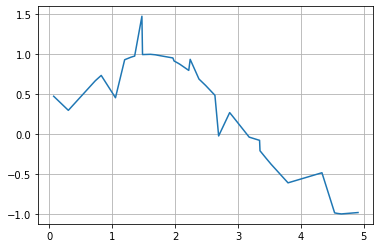

In [8]:
plt.plot( X, y )
plt.grid()
plt.show();

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [30]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 2

In [31]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

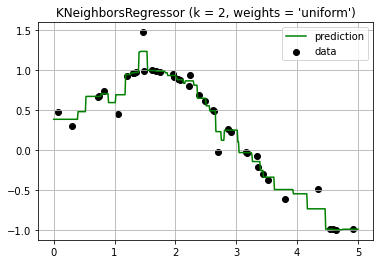

In [32]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

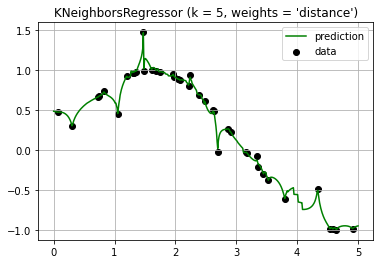

In [15]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()